<a href="https://colab.research.google.com/github/Hambach-AA/Big-Data-Mining-Lab/blob/main/Lab_1_IABD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
# !pip install apyori
# !pip install pyECLAT
# %pip install mlxtend --upgrade

In [59]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import pylab
from pyECLAT import ECLAT
from apyori import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder

Apriori

In [60]:
def apyori_fun(dataset, min_supports):
  result = []
  times = []
  for i in min_supports:
    time_1 = time.time()
    result.append(list(apriori(dataset, min_support = i, min_length = 2, min_confidence = 0.2, min_lift = 2)))
    time_2 = time.time()
    times.append(time_2 - time_1)
  
  for i in range(len(min_supports)):
    print(min_supports[i])
    print("<---->")
    for j in result[i]:
      print("{}, {}".format(set(j[0]), round(j[1],4)))

  return result, times

FP‑Growth

In [61]:
def fpgrowth_fun(dataset, min_supports):
  times = []
  result = []
  for i in min_supports:

    te = TransactionEncoder()
    te_ary = te.fit(dataset).transform(dataset)
    df = pd.DataFrame(te_ary, columns=te.columns_)

    time_1 = time.time()
    rules = fpgrowth(df, min_support=i, use_colnames=True)
    time_2 = time.time()
    
    rules = rules.to_numpy()
    result.append(rules)
    times.append(time_2 - time_1)

  for i in range(len(min_supports)):
    print(min_supports[i])
    print("<---->")
    for j in result[i]:
      print("{}, {}".format(set(j[1]), round(j[0],4)))

  return result, times


ECLAT

In [62]:
def ECLAT_fun(dataset, min_supports):
  times = []
  result = []
  df = pd.DataFrame(data=dataset)
  eclat_instance = ECLAT(data=df)
  for i in min_supports:
    time_1 = time.time()
    get_ECLAT_indexes, get_ECLAT_supports = eclat_instance.fit(min_support=i, min_combination=3, max_combination=10)
    time_2 = time.time()
    result.append(get_ECLAT_supports)
    times.append(time_2 - time_1)
  
  for i in range(len(min_supports)):
    print(min_supports[i])
    print("<---->")
    for j in result[i]:
       print("{}, {}".format(j, round(result[i][j],4)))

  return result, times

Построение графиков

In [63]:
def chart(min_supports, result_1, times_1, result_2, times_2, result_3, times_3):
  
  support = []
  for i in min_supports:
    support.append(str(i))

  quantity_1 = []
  for i in result_1:
    quantity_1.append(len(i))

  quantity_2 = []
  for i in result_2:
    quantity_2.append(len(i))

  quantity_3 = []
  for i in result_3:
    quantity_3.append(len(i))

  pylab.figure(figsize=(15, 15))
  
  pylab.subplot (2, 3, 1)
  pylab.bar(support, times_1)
  pylab.xlabel("Значение поддержки\ndataset_1")
  pylab.ylabel("Время работы")

  pylab.subplot (2, 3, 2)
  pylab.bar(support, times_2)
  pylab.xlabel("Значение поддержки\ndataset_2")
  pylab.ylabel("Время работы")

  pylab.subplot (2, 3, 3)
  pylab.bar(support, times_3)
  pylab.xlabel("Значение поддержки\ndataset_3")
  pylab.ylabel("Время работы")

  pylab.subplot (2, 3, 4)
  pylab.bar(support, quantity_1)
  pylab.xlabel("Значение поддержки\ndataset_1")
  pylab.ylabel("Количество наборов")

  pylab.subplot (2, 3, 5)
  pylab.bar(support, quantity_2)
  pylab.xlabel("Значение поддержки\ndataset_2")
  pylab.ylabel("Количество наборов")

  pylab.subplot (2, 3, 6)
  pylab.bar(support, quantity_3)
  pylab.xlabel("Значение поддержки\ndataset_3")
  pylab.ylabel("Количество наборов")

  pylab.show()

Чтение dataset

In [64]:
def read_dataset(name):
  dataset = pd.read_csv(name, header = None)
  dataset.fillna(method = 'ffill',axis = 1, inplace = True)
  dataset.head()
  dataset = dataset.to_numpy()
  print(dataset.shape)
  return dataset

In [65]:
min_supports = [0.009, 0.01, 0.03, 0.05, 0.09]
min_supports_ECLAT = [0.05, 0.09, 0.1]


In [66]:
dataset_1 = read_dataset('Market_Basket_Optimisation.csv')
dataset_2 = read_dataset('groceries.csv')
dataset_3 = read_dataset('retail.csv')

(7501, 20)
(9836, 32)
(316, 7)


Apriori

In [67]:
result_1, times_1 = apyori_fun(dataset_1, min_supports)

0.009
<---->
{'shrimp', 'frozen vegetables'}, 0.0167
{'frozen vegetables', 'tomatoes'}, 0.0161
{'ground beef', 'grated cheese'}, 0.0113
{'ground beef', 'herb & pepper'}, 0.016
{'ground beef', 'olive oil'}, 0.0141
{'ground beef', 'spaghetti'}, 0.0392
{'milk', 'soup'}, 0.0152
{'milk', 'whole wheat pasta'}, 0.0099
{'spaghetti', 'pepper'}, 0.0099
{'red wine', 'spaghetti'}, 0.0103
{'french fries', 'burgers', 'eggs'}, 0.0091
{'milk', 'chocolate', 'eggs'}, 0.0092
{'ground beef', 'chocolate', 'mineral water'}, 0.0109
{'ground beef', 'chocolate', 'spaghetti'}, 0.0092
{'milk', 'chocolate', 'mineral water'}, 0.014
{'milk', 'chocolate', 'spaghetti'}, 0.0109
{'ground beef', 'mineral water', 'eggs'}, 0.0101
{'ground beef', 'frozen vegetables', 'mineral water'}, 0.0092
{'milk', 'frozen vegetables', 'mineral water'}, 0.0111
{'spaghetti', 'frozen vegetables', 'mineral water'}, 0.012
{'ground beef', 'mineral water', 'milk'}, 0.0111
{'ground beef', 'spaghetti', 'milk'}, 0.0097
{'ground beef', 'mineral wa

In [68]:
result_2, times_2 = apyori_fun(dataset_2, min_supports)

0.009
<---->
{'whole milk', 'baking powder'}, 0.0093
{'beef', 'root vegetables'}, 0.0174
{'berries', 'whipped/sour cream'}, 0.009
{'yogurt', 'berries'}, 0.0106
{'root vegetables', 'butter'}, 0.0129
{'chicken', 'other vegetables'}, 0.0179
{'root vegetables', 'chicken'}, 0.0109
{'tropical fruit', 'citrus fruit'}, 0.0199
{'yogurt', 'cream cheese'}, 0.0124
{'curd', 'yogurt'}, 0.0173
{'root vegetables', 'domestic eggs'}, 0.0143
{'root vegetables', 'frozen vegetables'}, 0.0116
{'grapes', 'other vegetables'}, 0.009
{'other vegetables', 'hamburger meat'}, 0.0138
{'onions', 'other vegetables'}, 0.0142
{'root vegetables', 'onions'}, 0.0095
{'root vegetables', 'other vegetables'}, 0.0474
{'other vegetables', 'whipped/sour cream'}, 0.0289
{'pip fruit', 'tropical fruit'}, 0.0204
{'root vegetables', 'pork'}, 0.0136
{'root vegetables', 'whipped/sour cream'}, 0.0171
{'yogurt', 'tropical fruit'}, 0.0293
{'yogurt', 'whipped/sour cream'}, 0.0207
{'beef', 'whole milk', 'other vegetables'}, 0.0093
{'yogurt

In [69]:
result_3, times_3 = apyori_fun(dataset_3, min_supports)

0.009
<---->
{'Eggs', 'Cheese', 'Meat', 'Milk'}, 0.1519
{'Bagel', 'Meat', 'Bread', 'Cheese', 'Diaper'}, 0.0411
{'Bagel', 'Pencil', 'Milk', 'Eggs', 'Bread'}, 0.0285
{'Bagel', 'Milk', 'Eggs', 'Bread', 'Wine'}, 0.0316
{'Bagel', 'Meat', 'Eggs', 'Cheese', 'Diaper'}, 0.038
{'Bagel', 'Eggs', 'Cheese', 'Wine', 'Diaper'}, 0.0348
{'Bagel', 'Pencil', 'Cheese', 'Wine', 'Diaper'}, 0.0316
{'Bagel', 'Pencil', 'Milk', 'Eggs', 'Wine'}, 0.0253
{'Milk', 'Meat', 'Bread', 'Cheese', 'Diaper'}, 0.0348
{'Pencil', 'Milk', 'Eggs', 'Bread', 'Cheese'}, 0.0411
{'Milk', 'Pencil', 'Meat', 'Bread', 'Cheese'}, 0.038
{'Pencil', 'Meat', 'Bread', 'Cheese', 'Wine'}, 0.0538
{'Milk', 'Meat', 'Eggs', 'Bread', 'Diaper'}, 0.0253
{'Milk', 'Meat', 'Bread', 'Wine', 'Diaper'}, 0.0348
{'Pencil', 'Milk', 'Meat', 'Eggs', 'Bread'}, 0.0348
{'Milk', 'Meat', 'Eggs', 'Bread', 'Wine'}, 0.0411
{'Pencil', 'Milk', 'Eggs', 'Bread', 'Wine'}, 0.0443
{'Milk', 'Pencil', 'Meat', 'Bread', 'Wine'}, 0.0443
{'Pencil', 'Eggs', 'Cheese', 'Wine', 'Diaper'

FP‑Growth

In [70]:
result_4, times_4 = fpgrowth_fun(dataset_1, min_supports)

0.009
<---->
{'mineral water'}, 0.2384
{'green tea'}, 0.1321
{'low fat yogurt'}, 0.0765
{'shrimp'}, 0.0715
{'olive oil'}, 0.0659
{'frozen smoothie'}, 0.0633
{'honey'}, 0.0475
{'salmon'}, 0.0425
{'avocado'}, 0.0333
{'cottage cheese'}, 0.0319
{'tomato juice'}, 0.0304
{'energy drink'}, 0.0267
{'vegetables mix'}, 0.0257
{'almonds'}, 0.0204
{'yams'}, 0.0115
{'whole weat flour'}, 0.0093
{'green grapes'}, 0.0091
{'eggs'}, 0.1797
{'burgers'}, 0.0872
{'meatballs'}, 0.0209
{'turkey'}, 0.0625
{'milk'}, 0.1296
{'whole wheat rice'}, 0.0585
{'energy bar'}, 0.0271
{'french fries'}, 0.1709
{'whole wheat pasta'}, 0.0295
{'soup'}, 0.0505
{'light cream'}, 0.0156
{'spaghetti'}, 0.1741
{'frozen vegetables'}, 0.0953
{'cookies'}, 0.0804
{'cooking oil'}, 0.0511
{'champagne'}, 0.0468
{'chocolate'}, 0.1638
{'chicken'}, 0.06
{'oil'}, 0.0231
{'tomatoes'}, 0.0684
{'fresh tuna'}, 0.0223
{'black tea'}, 0.0143
{'extra dark chocolate'}, 0.012
{'protein bar'}, 0.0185
{'red wine'}, 0.0281
{'pepper'}, 0.0265
{'pasta'}, 0

In [71]:
result_5, times_5 = fpgrowth_fun(dataset_2, min_supports)

0.009
<---->
{'citrus fruit'}, 0.0828
{'margarine'}, 0.0586
{'semi-finished bread'}, 0.0177
{'yogurt'}, 0.1395
{'tropical fruit'}, 0.1049
{'coffee'}, 0.0581
{'whole milk'}, 0.2555
{'pip fruit'}, 0.0756
{'cream cheese'}, 0.0397
{'other vegetables'}, 0.1935
{'long life bakery product'}, 0.0374
{'condensed milk'}, 0.0103
{'butter'}, 0.0554
{'rolls/buns'}, 0.1839
{'bottled beer'}, 0.0805
{'UHT-milk'}, 0.0334
{'potted plants'}, 0.0173
{'bottled water'}, 0.1105
{'chocolate'}, 0.0496
{'white bread'}, 0.0421
{'curd'}, 0.0533
{'dishes'}, 0.0176
{'flour'}, 0.0174
{'beef'}, 0.0525
{'soda'}, 0.1744
{'frankfurter'}, 0.059
{'chicken'}, 0.0429
{'newspapers'}, 0.0798
{'fruit/vegetable juice'}, 0.0723
{'sugar'}, 0.0339
{'packaged fruit/vegetables'}, 0.013
{'specialty bar'}, 0.0273
{'pastry'}, 0.089
{'butter milk'}, 0.028
{'detergent'}, 0.0192
{'processed cheese'}, 0.0166
{'root vegetables'}, 0.109
{'waffles'}, 0.0384
{'salty snack'}, 0.0378
{'candy'}, 0.0299
{'frozen dessert'}, 0.0108
{'sweet spreads'}

In [72]:
result_6, times_6 = fpgrowth_fun(dataset_3, min_supports)

0.009
<---->
{'Bread'}, 0.5032
{'Cheese'}, 0.5
{'Meat'}, 0.4747
{'Wine'}, 0.4367
{'Eggs'}, 0.4367
{'Diaper'}, 0.4051
{'Pencil'}, 0.3608
{'Milk'}, 0.5
{'Bagel'}, 0.4241
{'Bread', 'Cheese'}, 0.2373
{'Milk', 'Cheese'}, 0.3038
{'Milk', 'Bread', 'Cheese'}, 0.1297
{'Cheese', 'Meat'}, 0.3228
{'Bread', 'Meat'}, 0.2057
{'Milk', 'Meat'}, 0.2437
{'Bread', 'Cheese', 'Meat'}, 0.1424
{'Milk', 'Bread', 'Meat'}, 0.1044
{'Milk', 'Bread', 'Cheese', 'Meat'}, 0.0759
{'Milk', 'Cheese', 'Meat'}, 0.2025
{'Cheese', 'Wine'}, 0.269
{'Meat', 'Wine'}, 0.25
{'Bread', 'Wine'}, 0.2437
{'Milk', 'Wine'}, 0.2184
{'Cheese', 'Meat', 'Wine'}, 0.1677
{'Bread', 'Cheese', 'Wine'}, 0.1424
{'Bread', 'Meat', 'Wine'}, 0.1329
{'Bread', 'Cheese', 'Meat', 'Wine'}, 0.0886
{'Milk', 'Cheese', 'Wine'}, 0.1614
{'Milk', 'Bread', 'Wine'}, 0.1297
{'Milk', 'Meat', 'Wine'}, 0.1266
{'Milk', 'Bread', 'Cheese', 'Wine'}, 0.0854
{'Milk', 'Cheese', 'Meat', 'Wine'}, 0.1013
{'Milk', 'Bread', 'Meat', 'Wine'}, 0.0759
{'Milk', 'Meat', 'Bread', 'Cheese'

ECLAT

In [73]:
# result_7, times_7 = ECLAT_fun(dataset_1, min_supports_ECLAT)

In [74]:
# result_8, times_8 = ECLAT_fun(dataset_2, min_supports_ECLAT)

In [75]:
result_9, times_9 = ECLAT_fun(dataset_3, min_supports_ECLAT)

Combination 3 by 3


84it [00:00, 121.16it/s]


Combination 4 by 4


126it [00:00, 126.83it/s]


Combination 5 by 5


126it [00:00, 186.77it/s]


Combination 6 by 6


84it [00:00, 163.15it/s]


Combination 7 by 7


36it [00:00, 144.53it/s]


Combination 8 by 8


9it [00:00, 123.10it/s]


Combination 9 by 9


1it [00:00, 100.41it/s]


Combination 10 by 10


0it [00:00, ?it/s]


Combination 3 by 3


84it [00:00, 136.03it/s]


Combination 4 by 4


126it [00:00, 191.35it/s]


Combination 5 by 5


126it [00:00, 182.48it/s]


Combination 6 by 6


84it [00:00, 165.42it/s]


Combination 7 by 7


36it [00:00, 149.61it/s]


Combination 8 by 8


9it [00:00, 121.97it/s]


Combination 9 by 9


1it [00:00, 73.94it/s]


Combination 10 by 10


0it [00:00, ?it/s]


Combination 3 by 3


84it [00:00, 141.54it/s]


Combination 4 by 4


126it [00:00, 188.26it/s]


Combination 5 by 5


126it [00:00, 153.12it/s]


Combination 6 by 6


84it [00:00, 106.64it/s]


Combination 7 by 7


36it [00:00, 101.28it/s]


Combination 8 by 8


9it [00:00, 92.10it/s]


Combination 9 by 9


1it [00:00, 71.30it/s]


Combination 10 by 10


0it [00:00, ?it/s]

0.05
<---->
Eggs & Bagel & Pencil, 0.0728
Eggs & Bagel & Milk, 0.0633
Eggs & Bagel & Meat, 0.0918
Eggs & Bagel & Bread, 0.0854
Eggs & Bagel & Cheese, 0.0918
Eggs & Bagel & Wine, 0.0918
Eggs & Bagel & Diaper, 0.0696
Eggs & Pencil & Milk, 0.0854
Eggs & Pencil & Meat, 0.0791
Eggs & Pencil & Bread, 0.0981
Eggs & Pencil & Cheese, 0.1076
Eggs & Pencil & Wine, 0.1203
Eggs & Pencil & Diaper, 0.0823
Eggs & Milk & Meat, 0.1772
Eggs & Milk & Bread, 0.1044
Eggs & Milk & Cheese, 0.1962
Eggs & Milk & Wine, 0.1361
Eggs & Milk & Diaper, 0.0728
Eggs & Meat & Bread, 0.0918
Eggs & Meat & Cheese, 0.2152
Eggs & Meat & Wine, 0.1487
Eggs & Meat & Diaper, 0.0854
Eggs & Bread & Cheese, 0.1171
Eggs & Bread & Wine, 0.1203
Eggs & Bread & Diaper, 0.0886
Eggs & Cheese & Wine, 0.1646
Eggs & Cheese & Diaper, 0.1013
Eggs & Wine & Diaper, 0.1108
Bagel & Pencil & Milk, 0.0696
Bagel & Pencil & Meat, 0.0854
Bagel & Pencil & Bread, 0.0886
Bagel & Pencil & Cheese, 0.0886
Bagel & Pencil & Wine, 0.0823
Bagel & Pencil & Diaper

Графики

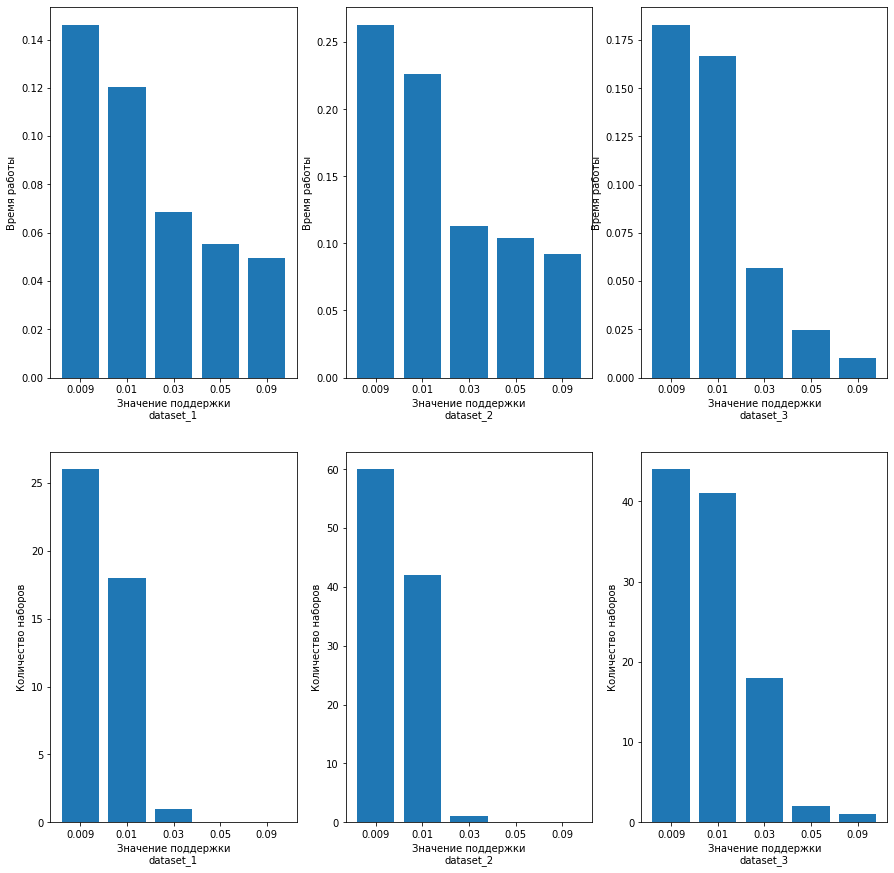

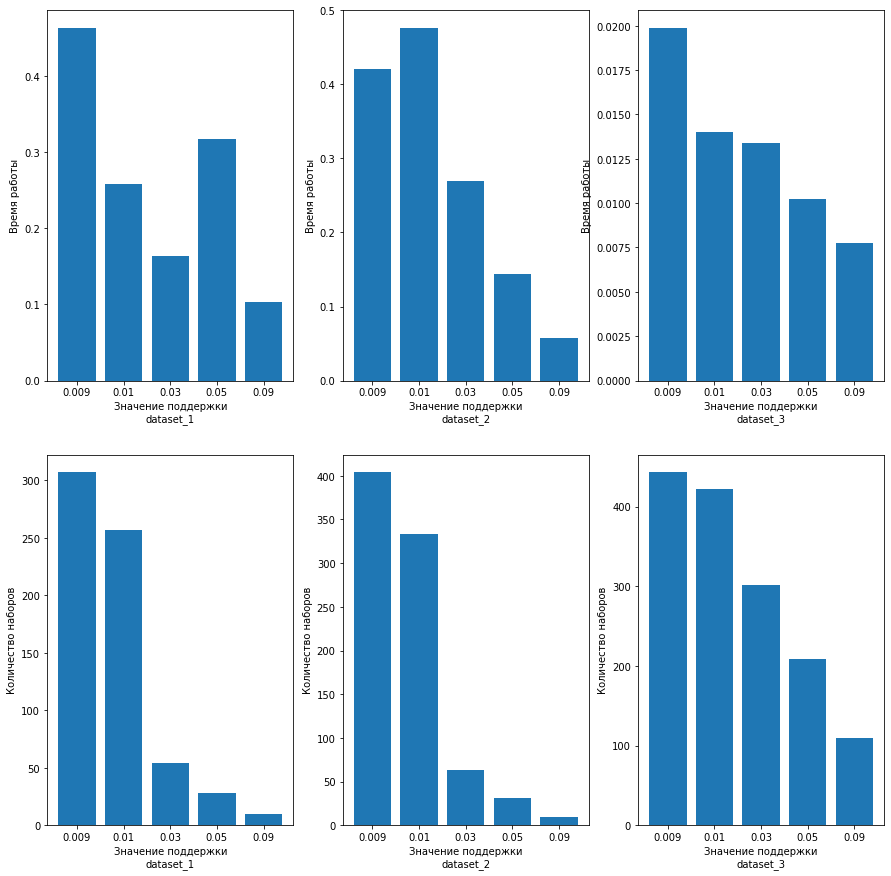

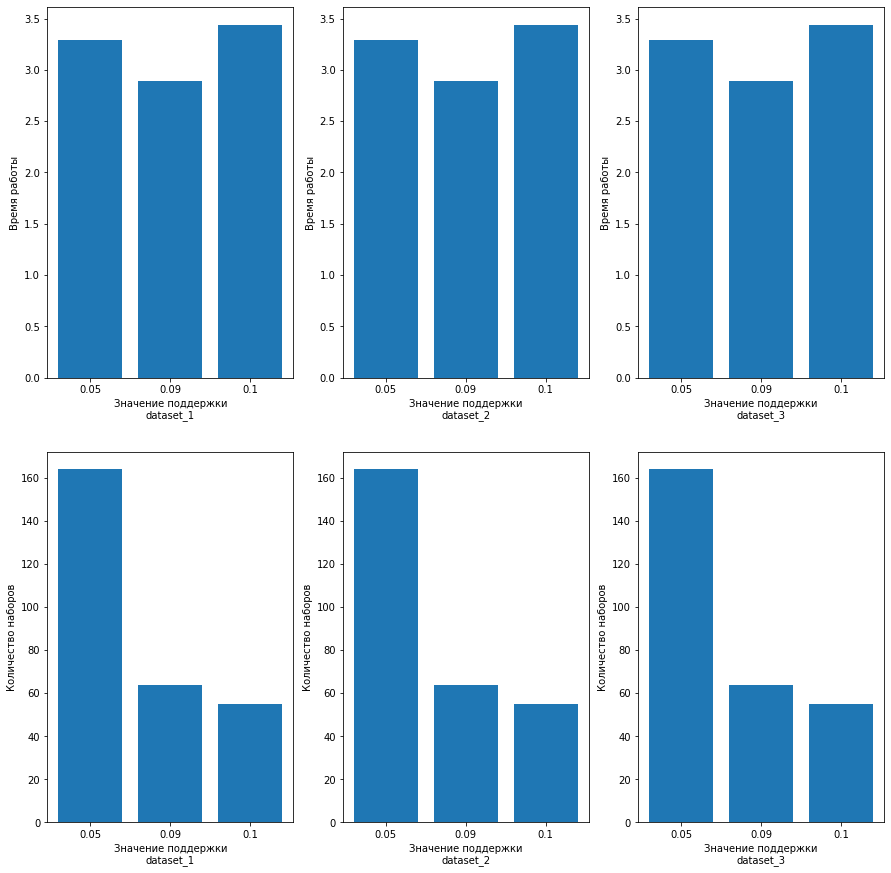

In [76]:
chart(min_supports, result_1, times_1, result_2, times_2, result_3, times_3)
chart(min_supports, result_4, times_4, result_5, times_5, result_6, times_6)
chart(min_supports_ECLAT, result_9, times_9, result_9, times_9, result_9, times_9)